## Imports

In [117]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import speckleret

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load pre-computed example speckle

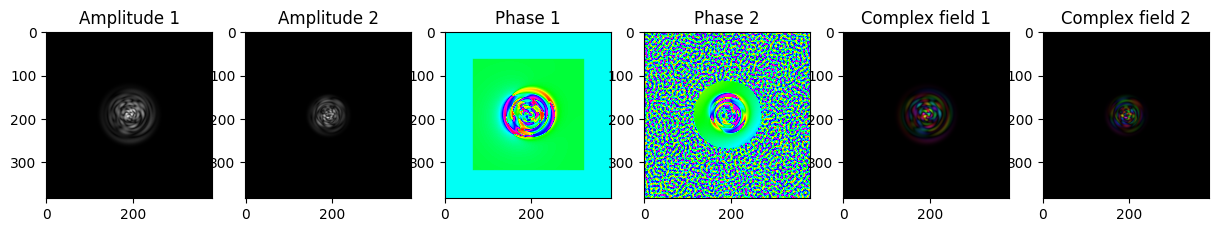

In [136]:
field = np.load('../imports/grin_speckle_example.npy')
field = speckleret.transforms.pad_img(field, pad=0.5)
ft = speckleret.transforms.fourier_transform(field, pad=None)
_ = speckleret.plots.compare_complex_fields(field, ft)

## Generate and visualize support

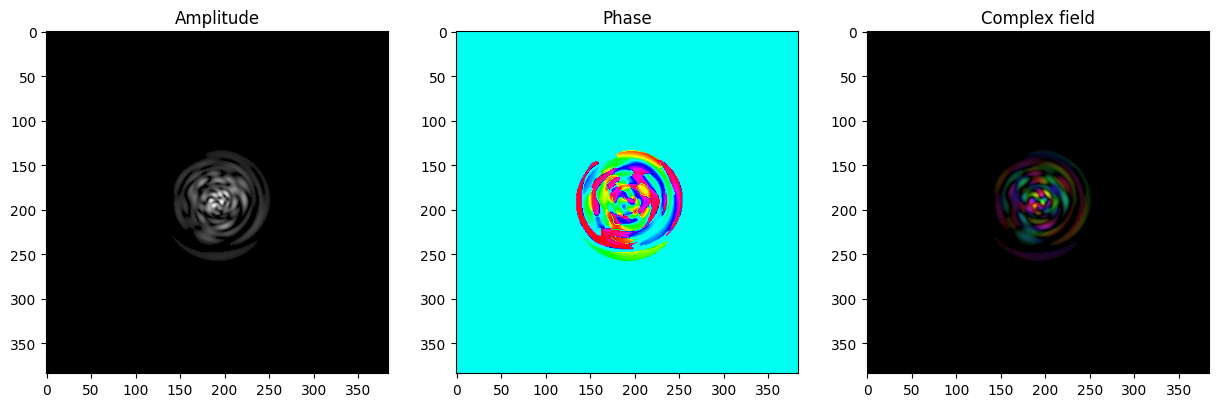

In [137]:
# support = speckleret.supports.disk_support(field, radius=65)
support = speckleret.supports.threshold_support(field, threshold=0.01)
supported_field = field * support
_ = speckleret.plots.complex_imshow(supported_field)

## Run retrieval and show convergence and metrics

In [130]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(field), np.abs(ft)), support, pad=None, beta=0.99, max_iter=1, max_er_iter=200, max_hio_iter=100)

1 / 2
2 / 2


Quality: 0.9891417062858284
Pearson: 1.0


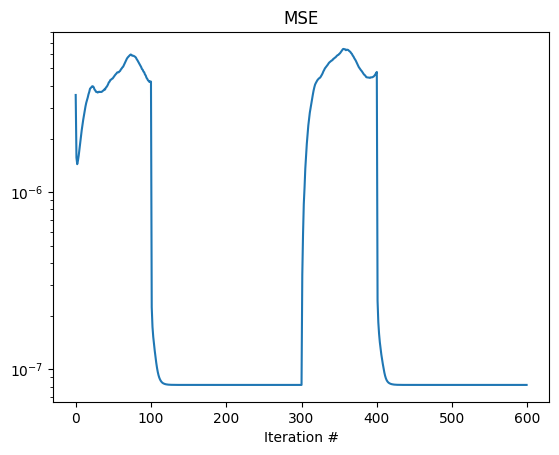

In [131]:
print(f"Quality: {speckleret.metrics.quality(y_hat[support], field[support])}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat[support], field[support])}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

## Compare retrieved field with initial field

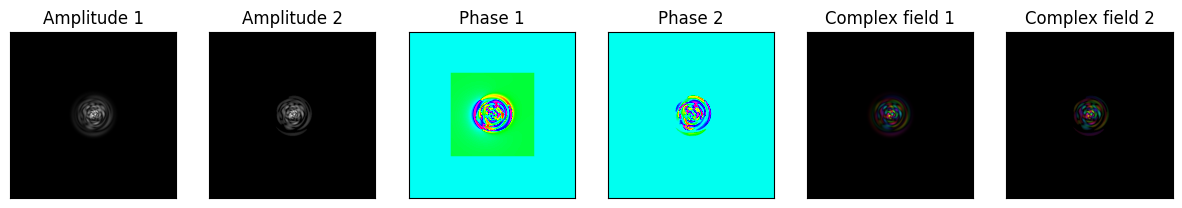

In [132]:
_ = speckleret.plots.compare_complex_fields(field, y_hat, remove_ticks=True)